In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
from pathlib import Path
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import xclimate as xclim
import plotting as myplt

In [37]:
v = "EFLX_LH_TOT"

# Load parameter settings key
clm6_key = pd.read_csv("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/ctsm6_oaat_key.csv")

# Load postprocessed temporally averaged dataset 
in_file = Path("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_1985-2023.nc")
clm6_tm = xr.open_dataset(in_file).rename({"ens": "member"})

# Append key to ds
clm6_tm = clm6_tm.assign_coords(
    key=("member", clm6_key["key"].values),
    param=("member", clm6_key["param"].values),
    minmax=("member", clm6_key["minmax"].values)
)
clm6_tm = clm6_tm.set_index(member=["param", "minmax", "key"], append=True)
clm6_tm = clm6_tm[[vv for vv in clm6_tm.data_vars if str(vv).startswith(v)]]


# Load postprocessed timeseries dataset
in_file = Path("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_timeseries_1901-2023.nc")
clm6_ts = xr.open_dataset(in_file).rename({"ens": "member"})

# Append key to ds
clm6_ts = clm6_ts.assign_coords(
    key=("member", clm6_key["key"].values),
    param=("member", clm6_key["param"].values),
    minmax=("member", clm6_key["minmax"].values)
)
clm6_ts = clm6_ts.set_index(member=["param", "minmax", "key"], append=True)
clm6_ts = clm6_ts[[vv for vv in clm6_ts.data_vars if str(vv).startswith(v)]]

In [33]:
in_file = Path("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_1985-2023.nc")
clm6_tm = xr.open_dataset(in_file)

In [38]:
clm6_tm

<xarray.Dataset> Size: 414kB
Dimensions:                   (member: 119, gridcell: 400, biome: 10)
Coordinates:
    quantile                  float64 8B ...
  * gridcell                  (gridcell) int64 3kB 0 1 2 3 4 ... 396 397 398 399
  * biome                     (biome) float64 80B 0.0 1.0 2.0 ... 7.0 8.0 9.0
  * member                    (member) object 952B MultiIndex
  * param                     (member) object 952B 'default' 'kmax' ... 'RF_CWD'
  * minmax                    (member) object 952B 'max' 'min' ... 'min' 'max'
  * key                       (member) object 952B 'oaat0000' ... 'oaat0118'
Data variables:
    EFLX_LH_TOT_gridded_mean  (member, gridcell) float64 381kB ...
    EFLX_LH_TOT_global_amp    (member) float32 476B ...
    EFLX_LH_TOT_global_std    (member) float64 952B ...
    EFLX_LH_TOT_global_mean   (member) float64 952B ...
    EFLX_LH_TOT_biome_amp     (biome, member) float32 5kB ...
    EFLX_LH_TOT_biome_std     (biome, member) float64 10kB ...
    EFLX_LH_TOT_biome_mean    (biome, member) float64 10kB ...

In [20]:
clm6_tm

<xarray.Dataset> Size: 410kB
Dimensions:                   (ens: 119, gridcell: 400, biome: 10)
Coordinates:
    quantile                  float64 8B ...
  * gridcell                  (gridcell) int64 3kB 0 1 2 3 4 ... 396 397 398 399
  * biome                     (biome) float64 80B 0.0 1.0 2.0 ... 7.0 8.0 9.0
Dimensions without coordinates: ens
Data variables:
    EFLX_LH_TOT_gridded_mean  (ens, gridcell) float64 381kB ...
    EFLX_LH_TOT_global_amp    (ens) float32 476B ...
    EFLX_LH_TOT_global_std    (ens) float64 952B ...
    EFLX_LH_TOT_global_mean   (ens) float64 952B ...
    EFLX_LH_TOT_biome_amp     (biome, ens) float32 5kB ...
    EFLX_LH_TOT_biome_std     (biome, ens) float64 10kB ...
    EFLX_LH_TOT_biome_mean    (biome, ens) float64 10kB ...

In [ ]:
# varname = "TSA"

# # Load parameter settings key
# clm6_key = pd.read_csv("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/ctsm6_oaat_key.csv")

# # Load postprocessed temporally averaged dataset 
# in_file = Path("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_1985-2023.nc")
# clm6_tm = xr.open_dataset(in_file)

# # Append key to ds
# clm6_tm = clm6_tm.assign_coords(
#     key=("member", clm6_key["key"].values),
#     param=("member", clm6_key["param"].values),
#     minmax=("member", clm6_key["minmax"].values)
# )
# clm6_tm = clm6_tm.set_index(ens=["param", "minmax", "key"], append=True)
# clm6_tm = clm6_tm[[v for v in clm6_tm.data_vars if str(v).startswith(varname)]]


# # Load postprocessed timeseries dataset
# in_file = Path("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/postp/ctsm6_oaat_postp_timeseries_1901-2023.nc")
# clm6_ts = xr.open_dataset(in_file)

# # Append key to ds
# clm6_ts = clm6_ts.assign_coords(
#     key=("member", clm6_key["key"].values),
#     param=("member", clm6_key["param"].values),
#     minmax=("member", clm6_key["minmax"].values)
# )
# clm6_ts = clm6_ts.set_index(ens=["param", "minmax", "key"], append=True)
# clm6_ts = clm6_ts[[v for v in clm6_ts.data_vars if str(v).startswith(varname)]]

In [ ]:
# def _preprocess(ds):
#     return ds[["TSA"]]

# indir = Path("/glade/campaign/cgd/tss/projects/PPE/ctsm6_oaat/hist")

# ds = []
# for i in range(0, 2):
#     pattern = f"BNF_v2.n01_ctsm5.3.012_transient_oaat{str(i).zfill(4)}.clm2.h0.*.nc"
#     files = indir.glob(pattern)
#     ds.append(xr.open_mfdataset(list(files), preprocess=_preprocess, decode_timedelta=False))

In [3]:
grid_fhist = xclim.load_coupled_fhist_ppe("EFLX_LH_TOT", "lnd", "month_1")[["area", "landfrac"]].isel(member=0).fillna(0)
la_fhist = grid_fhist.area * grid_fhist.landfrac
tsa_fhist = xclim.load_coupled_fhist_ppe("TSA", "lnd", "month_1", stream="h0", keep_var_only=True)["TSA"]

In [14]:
grid_le = xclim.load_cesm2le("EFLX_LH_TOT", "lnd", "month_1", "h0")[["area", "landfrac"]].isel(member=0, time=0).fillna(0)
la_le = grid_le.area * grid_le.landfrac
tsa_le = xclim.load_cesm2le("TSA", "lnd", "month_1", "h0", keep_var_only=True).sel(time=slice("1900-01", None))["TSA"]

In [16]:
tsa_fhist = tsa_fhist - 273.15
tsa_le = tsa_le - 273.15

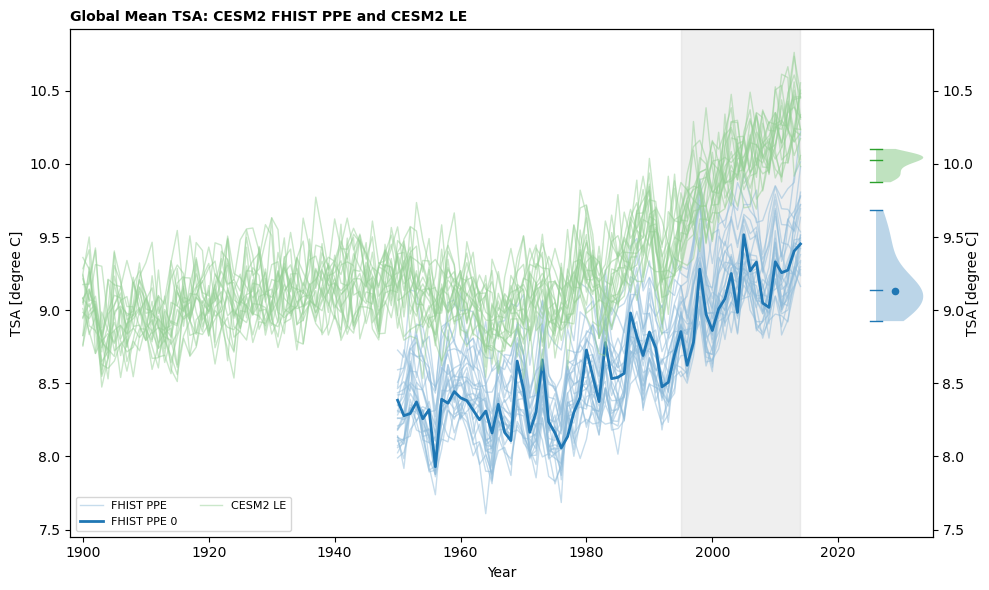

In [ ]:
fig, ax = myplt.plot_fancy_timeseries(
    das=[tsa_fhist, tsa_le],
    das_weights=[la_fhist, la_le],
    das_labels=["FHIST PPE", "CESM2 LE"],
    ylabel="TSA [degree C]",
    xlabel="Year",
    title="Global Mean TSA: CESM2 FHIST PPE and CESM2 LE",
    member_coord="member",
    colors=["tab:blue", "tab:green"],
    highlight_member=[0, None],
)